In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [13]:
data = pd.read_csv('../data/mushroom_clean.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True) 

In [14]:
dic = {'1' : 'bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s' , '2' : 'fibrous=f,grooves=g,scaly=y,smooth=s',
'3' : 'brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y' , '4' : 'bruises=t,no=f' , '5' : 'almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s',
'6' : 'attached=a,descending=d,free=f,notched=n' , '7' : 'close=c,crowded=w,distant=d' , '8' : 'broad=b,narrow=n',
'9' : 'black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y',
'10' : 'enlarging=e,tapering=t' , '11' : 'bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?',
'11' : 'fibrous=f,scaly=y,silky=k,smooth=s' , '12' : 'fibrous=f,scaly=y,silky=k,smooth=s' , '13' : 'brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y',
'14' : 'brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y' , '15' : 'partial=p,universal=u',
'16' : 'brown=n,orange=o,white=w,yellow=y', '17' : 'none=n,one=o,two=t', '18' : 'cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z' , 
'19' : 'black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y' , '20' : 'abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y' ,
 '21': 'grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'  }
cl= data.columns.tolist()
ind = 0
for i in dic.values() : 
    ind = ind +  1 
    l = i.split(',') 
    for i in range(0,len(l)) : 
        le = len(l[i]) -1
        c = l[i][le] 
        last = '=' + c 
        slice = l[i].find(last)
        data[cl[ind]]  = data[cl[ind]].apply(lambda x : x.replace(c, l[i][:slice]) if  x == c else x)

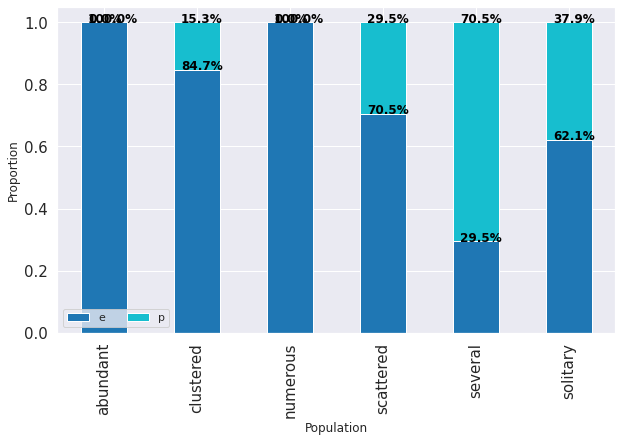

In [15]:
# Population vs class 

cross_tab_prop = pd.crosstab(index=data['population'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Population")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

The main objective of our EDA is to find the variables that have the most effect on the mushroom class. Here we can see if the population is abundant or numerous then the class will definitely be edible

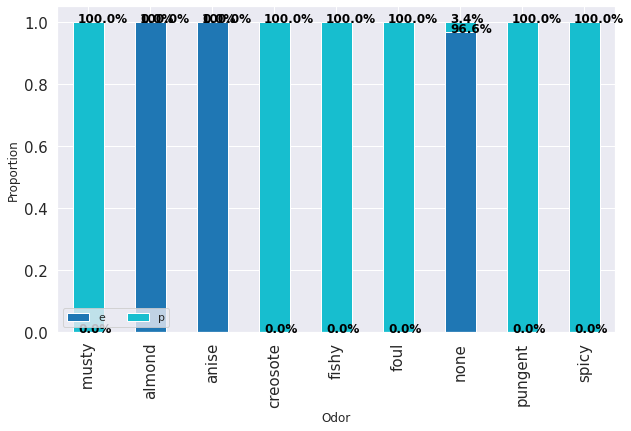

In [16]:
# Odor vs class

cross_tab_prop = pd.crosstab(index=data['odor'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Odor")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

The second graph is for the proportion of the smell. So you can almost identify if it is edible or not by the smell. Only number 4 has a slight variation with 3.4%. This can indicate that this column will have a significant effect on our classification model.

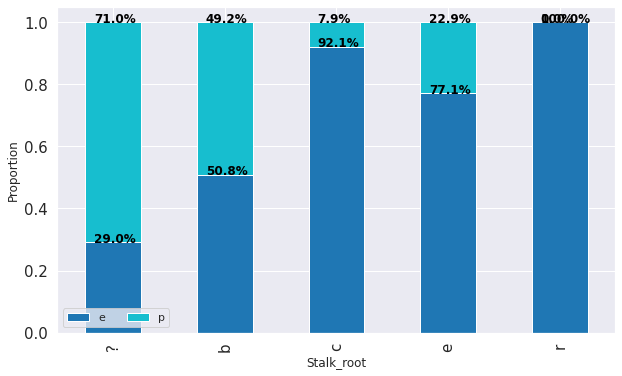

In [17]:
cross_tab_prop = pd.crosstab(index=data['stalk_root'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Stalk_root")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

**Insight**: 
   ##### We see that if the mushroom has a __club__, __cup__, or __rooted__ stalk root, then there is a low chance for it to be poisonous. However, if the root is __bulbous__ then a chance of 49.2% is that the mushroom is poisonous. Moreover, in the dataset we have 2480 mushrooms with a __missing__ stalk root.


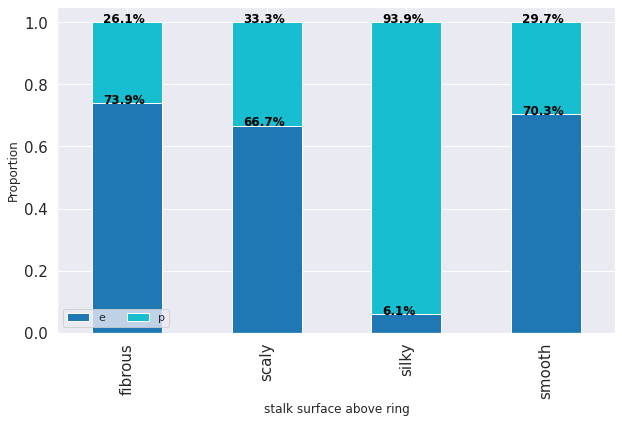

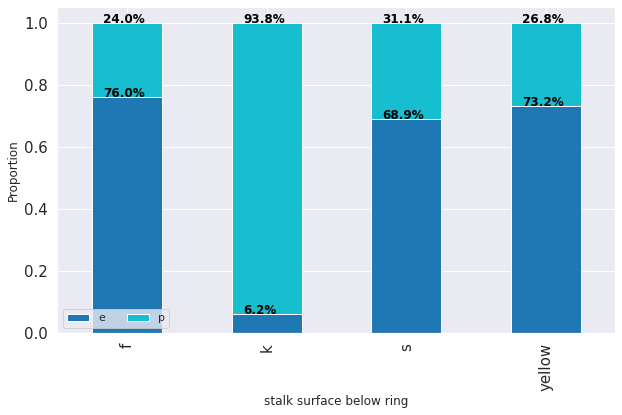

In [18]:
# Stalk_surface vs class

# stalk_surface_above_ring

cross_tab_prop = pd.crosstab(index=data['stalk_surface_above_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk surface above ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# stalk_surface_below ring

cross_tab_prop = pd.crosstab(index=data['stalk_surface_below_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk surface below ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks


**Insight**: 
   ##### For the stalk surface, we see that the percentage are similar for above & below ring. __Fibrous__, __smooth__, and __scaly__ mushorooms have an average possibility of being poisonous as 25.1%, 30.4%, and 30.1%, respectively. However, __silky__ mushrooms have an average possibility of 93.9% for being poisonuous.
   #### The dataset contains:
      1- 2372 mushrooms with silky stalk surface above ring.
      2- 2304 mushrooms with silky stalk surface below ring.
      3- 1800 mushrooms with silky stalk surface above and below ring.

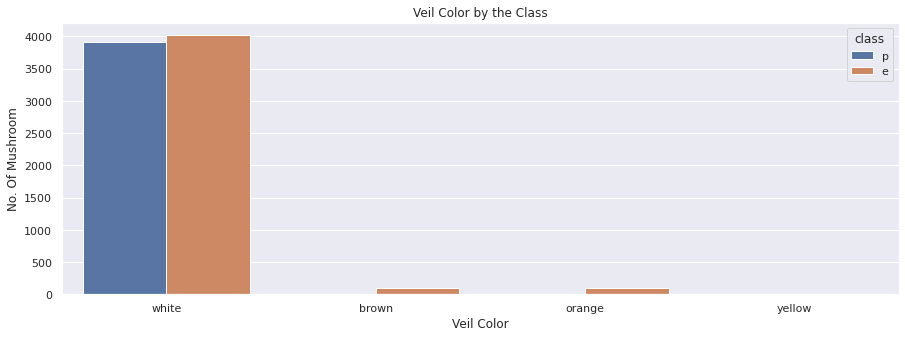

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x = 'veil_color' , hue = 'class' , data = data )
plt.title('Veil Color by the Class')
plt.xlabel('Veil Color')
plt.ylabel('No. Of Mushroom');
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=10);

From the graph, we can see that the Veil Color can be used to know the class of the mushroom except when the color is white.

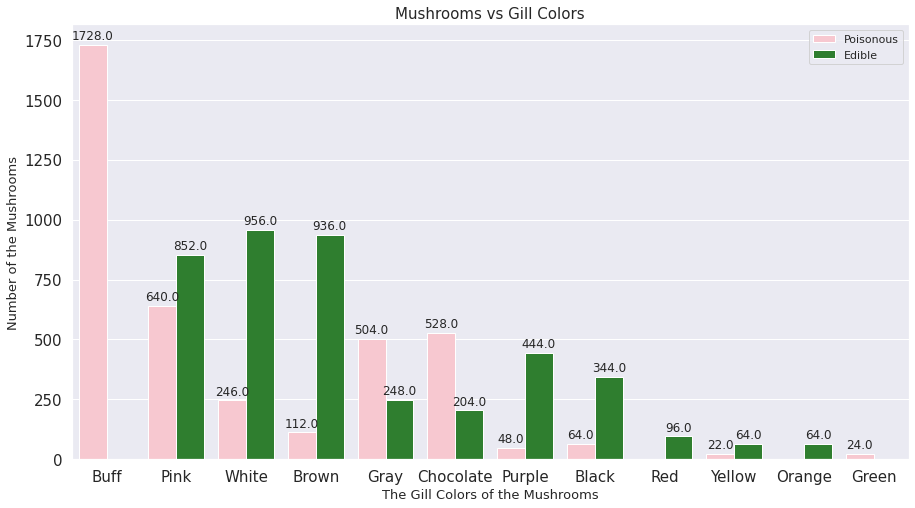

In [20]:
plt.figure(figsize=(15, 8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
splot = sns.countplot(data=data, x='gill_color',
                      hue='class',
                      order=data['gill_color'].value_counts().index,
                      palette=['pink', 'forestgreen'])
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=13)
plt.title('Mushrooms vs Gill Colors', fontsize=15);

As we can see from the figure above, the Buff-colored gills are highly poisonous. In contrast, the White, Brown, Purple, Black, and Red gill colors are high frequently edible.